## Net charge calculator for peptide sequences

#### This notebook allows a user to input a peptide sequence made up of the one-letter name for each animo acid. It then outputs a graph showing the charge of the peptide as a function of pH.

##### The following equation is used: $z = \sum_{i}N_{i}\frac{10^{\mathrm{pKa}_{i}}}{10^{\mathrm{pH}}+10^{\mathrm{pKa}_{i}}} - \sum_{j}N_{j}\frac{10^{\mathrm{pH}}}{10^{\mathrm{pH}}+10^{\mathrm{pKa}_{j}}}$
##### where $z$ = net charge, $i$ pertains to the N-terminus and positively charged side groups, $j$ pertains to the C-terminus and negatively-charged side groups, and $N$ is the number of each. 

Import the necessary modules.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.axes as Axes

%matplotlib inline

Assigns pKa values for the N-terminals and C-terminals of each amino acid, as well as the pKa of charged side groups.

In [2]:
N_terms = {'R': 9.00, 'H': 9.09, 'K': 9.16, 'D': 9.66, 'E': 9.58, 'S': 9.05, 'T': 8.96, 'N': 8.76, 'Q': 9.00, 'C': 10.28, 'U': 10.00, 'G': 9.58, 'P': 10.47, 'A': 9.71, 'V': 9.52, 'I': 9.60, 'L': 9.58, 'M': 9.08, 'F': 9.09, 'Y': 9.04, 'W': 9.34}

C_terms = {'R': 2.03, 'H': 1.70, 'K': 2.15, 'D': 1.95, 'E': 2.16, 'S': 2.13, 'T': 2.20, 'N': 2.16, 'Q': 2.18, 'C': 1.91, 'U': 1.90, 'G': 2.34, 'P': 1.95, 'A': 2.33, 'V': 2.27, 'I': 2.26, 'L': 2.32, 'M': 2.16, 'F': 2.18, 'Y': 2.24, 'W': 2.38}

pos_side_groups = {'R': 12.10, 'H': 6.04, 'K': 10.67}

neg_side_groups = {'D': 3.71, 'E': 4.15, 'C': 8.14, 'Y': 10.10}

Creates a function that will calculate the net charge of the peptide using a given pH and peptide sequence.

In [3]:
def net_charge(pH, peptide_sequence):
    
    # Turns the peptide sequence into a list of the individual letters
    sequence_aas = list(peptide_sequence)
    
    # The positive and negative charges will be added to later after iterating through the list
    positive_charge = 0
    negative_charge = 0
    
    # Assigns the pKa of the N- and C-termnials based on which amino acid they correspond to
    N_terminal = N_terms[sequence_aas[0]]
    C_terminal = C_terms[sequence_aas[-1]]
    
    # Adds charge value to the positive and negative charges for amino acids with charged side groups
    for aa in sequence_aas:
        if aa in pos_side_groups:
            positive_charge += 10**pos_side_groups[aa] / (10**pH + 10**pos_side_groups[aa])
        elif aa in neg_side_groups:
            negative_charge += 10**pH / (10**neg_side_groups[aa] + 10**pH)
        else:
            continue
            
    # Adds charge for the terminals using the pKas assigned earlier
    positive_charge += 10**N_terminal / (10**pH + 10**N_terminal)
    negative_charge += 10**pH / (10**pH + 10**C_terminal)
    
    # Calculates overall charge
    overall_charge = positive_charge - negative_charge

    return overall_charge

To calculate charges at all pH (in increments of 0.1 from 0.1 to 14) for a peptide sequence:

In [4]:
def all_charges():
    pH = 0.1
    peptide_sequence = input("Insert the peptide sequence, from N-terminal to C-terminal: ")
    pH_charge_dict = {}
    while pH < 14:
        net_charge(pH, peptide_sequence)
        pH_charge_dict[pH] = net_charge(pH, peptide_sequence)
        pH += 0.10
        
    lists = sorted(pH_charge_dict.items())
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    
    
    fig, ax1 = plt.subplots(facecolor='white')
    
    plt.axhline(y=0, color='black', alpha=0.5, lw=1, ls='--') # Plots line at y = 0 to approximate pI (isoelectric point) when graph crosses x-axis
    ax1.set_xlabel('pH')
    ax1.set_ylabel('Net charge (z)')
    
    ax1.plot(x, y, '#1D71B8', label=peptide_sequence) 
    
    ax1.tick_params(labelcolor='#2EA2CA')
    
    ax1.spines['left'].set_color('#111111')
    ax1.spines['bottom'].set_color('#111111')
    ax1.tick_params(axis='x', colors='black')
    ax1.tick_params(axis='y', colors='black')
    
    #plt.savefig(peptide_sequence + '_charge.pdf', transparent=True, dpi=600)
    plt.tight_layout()
    plt.show()

Insert the peptide sequence, from N-terminal to C-terminal:  TFFYGGSRGKRNNFKTEEY


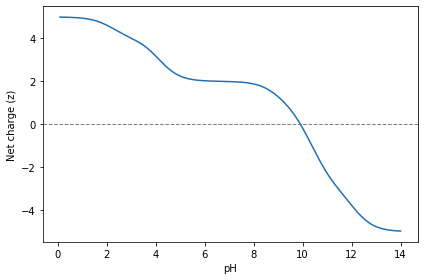

In [5]:
all_charges()